In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd

file_path = '/Users/amiryaacoobi/Desktop/STA141C Final Project/who_cleaned.csv'
who_cleaned = pd.read_csv(file_path)

print(who_cleaned.columns.tolist())

X = who_cleaned.drop(columns=['country', 'country_code', 'region', 'year', 'life_expect', 'life_exp60'])
y = who_cleaned['life_expect']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)





['country', 'country_code', 'region', 'year', 'life_expect', 'life_exp60', 'alcohol', 'age5.19thinness', 'age5.19obesity', 'measles', 'diphtheria', 'basic_water', 'gni_capita', 'gghe.d', 'che_gdp']


In [28]:
who_cleaned.head()

,country,country_code,region,year,life_expect,life_exp60,alcohol,age5.19thinness,age5.19obesity,measles,diphtheria,basic_water,gni_capita,gghe.d,che_gdp
0,Angola,AGO,Africa,2000,47.33730,14.73400,1.47439,11.0,0.5,32,31,41.14431,2190.0,1.11099,1.90860
1,Angola,AGO,Africa,2001,48.19789,14.95963,1.94025,10.9,0.5,60,42,42.25467,2290.0,2.04631,4.48352
2,Angola,AGO,Africa,2002,49.42569,15.20010,2.07512,10.7,0.6,59,47,43.37680,2690.0,1.30863,3.32946
3,Angola,AGO,Africa,2003,50.50266,15.39144,2.20275,10.5,0.7,44,46,44.36387,2820.0,1.46560,3.54797
4,Angola,AGO,Africa,2004,51.52863,15.56860,2.41274,10.3,0.8,43,47,45.35134,3080.0,1.68663,3.96720


# Heatmap

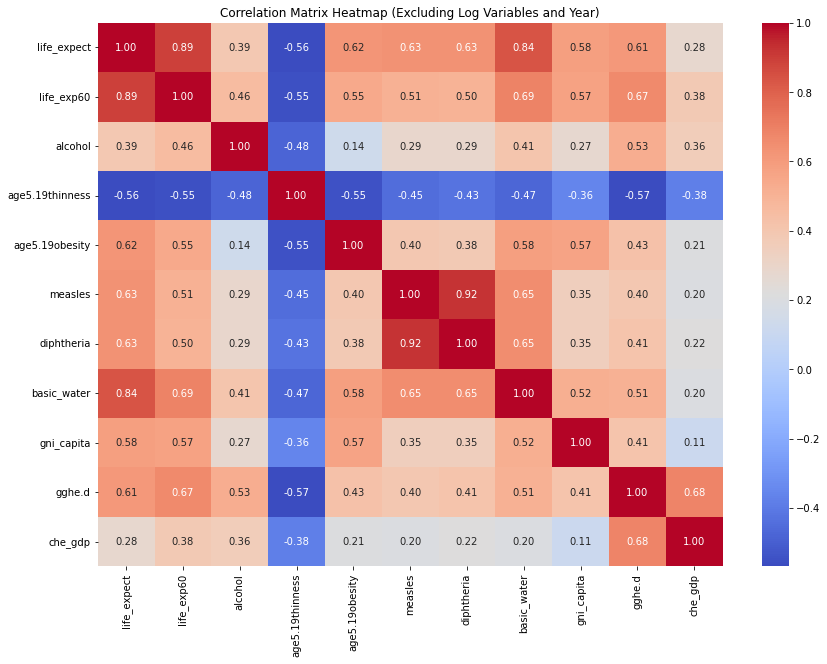

In [55]:
# Exclude columns that start with 'log_' and the 'year' column from the correlation matrix
non_log_non_year_columns = [col for col in who_cleaned.columns if not col.startswith('log_') and col != 'year']
correlation_matrix_without_log_year = who_cleaned[non_log_non_year_columns].corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_without_log_year, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Excluding Log Variables and Year)')
plt.show()




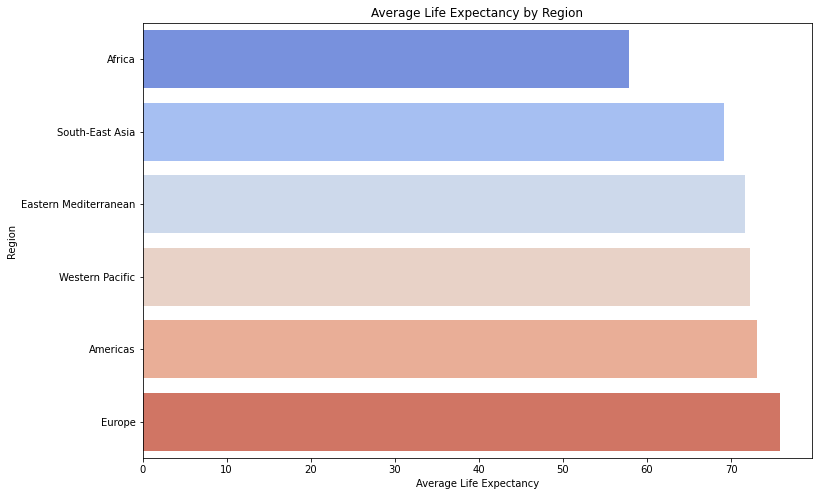

In [30]:
# avg life expectancy for each region
average_life_expectancy_by_region = who_cleaned.groupby('region')['life_expect'].mean().sort_values()

# bar chart for average life expectancy by region
plt.figure(figsize=(12, 8))
sns.barplot(x=average_life_expectancy_by_region.values, y=average_life_expectancy_by_region.index, palette='coolwarm')
plt.title('Average Life Expectancy by Region')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Region')
plt.show()


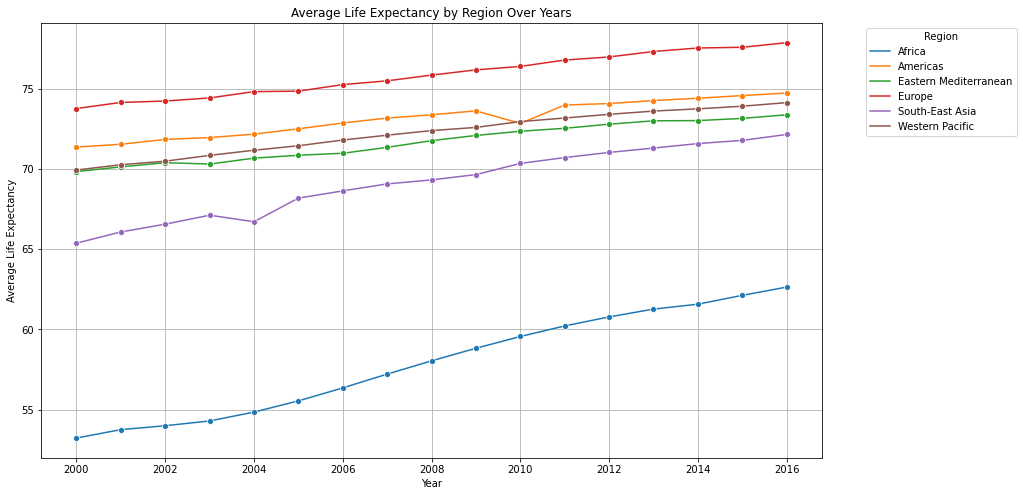

In [31]:
# avg life expectancy by region
average_life_expectancy_by_region_year = who_cleaned.groupby(['region', 'year'])['life_expect'].mean().reset_index()

# line plot for avg life expectancy by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_life_expectancy_by_region_year, x='year', y='life_expect', hue='region', marker='o', palette='tab10')
plt.title('Average Life Expectancy by Region Over Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


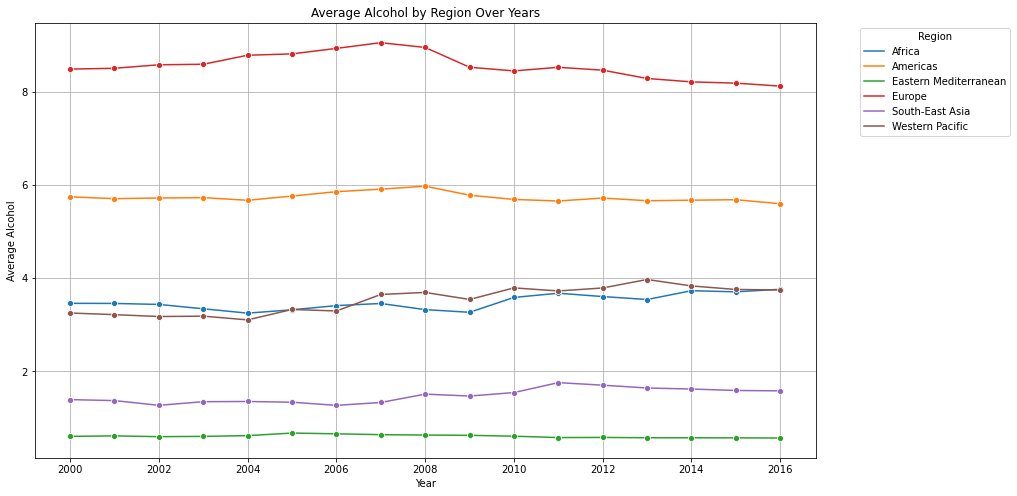

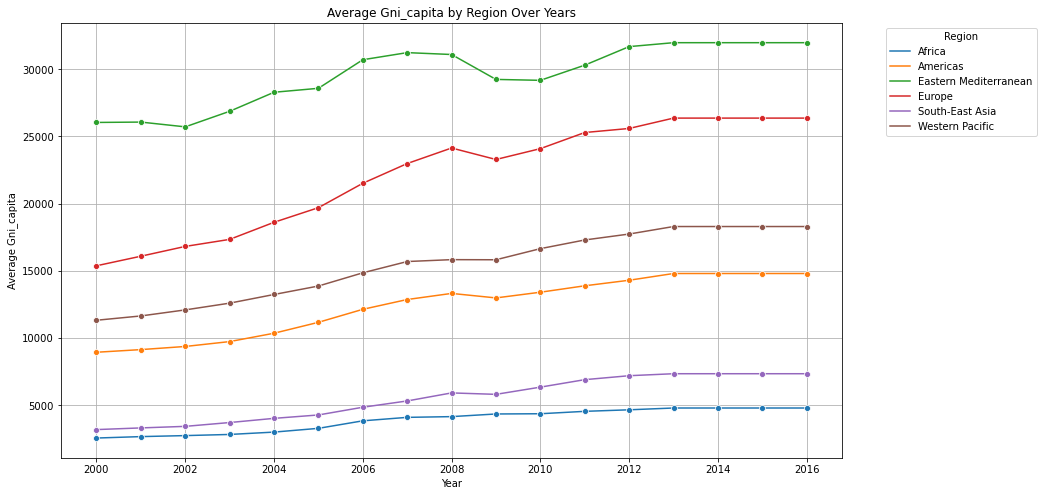

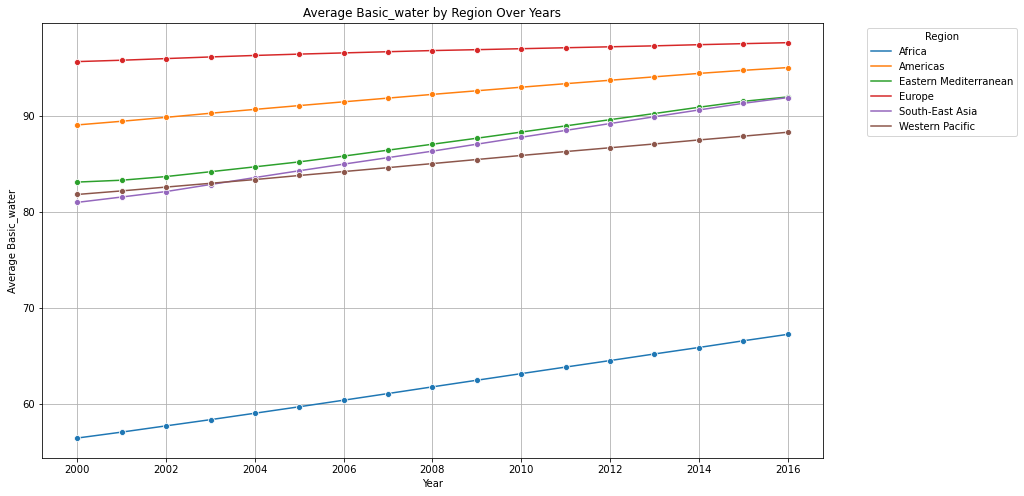

In [34]:
# List of variables to visualize over time across regions
variables_of_interest = ['alcohol', 'gni_capita', 'basic_water']

# line plots for each variable
for variable in variables_of_interest:
    # Calculate the average value of the variable for each region over the years
    average_by_region_year = who_cleaned.groupby(['region', 'year'])[variable].mean().reset_index()

    # Generate a line plot
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=average_by_region_year, x='year', y=variable, hue='region', marker='o', palette='tab10')
    plt.title(f'Average {variable.capitalize()} by Region Over Years')
    plt.xlabel('Year')
    plt.ylabel(f'Average {variable.capitalize()}')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


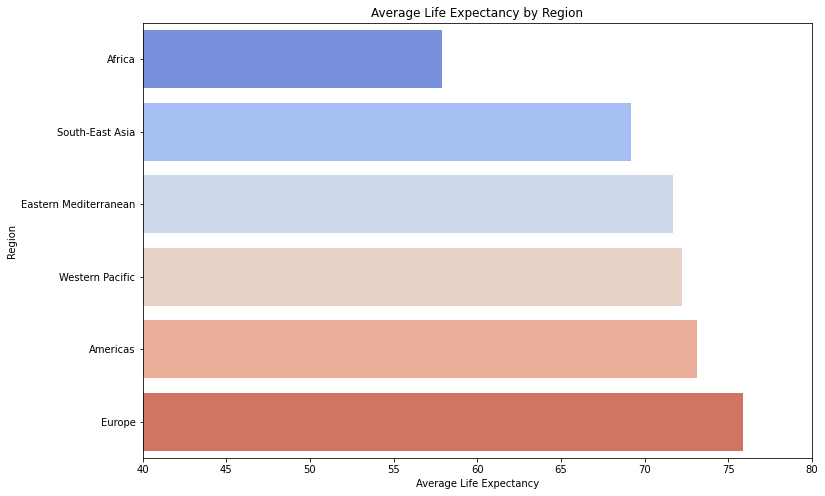

In [37]:

average_life_expectancy_by_region = who_cleaned.groupby('region')['life_expect'].mean().sort_values()

# Generating the bar chart for average life expectancy for each of the regions
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=average_life_expectancy_by_region.values, y=average_life_expectancy_by_region.index, palette='coolwarm')
plt.title('Average Life Expectancy by Region')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Region')
bar_plot.set_xlim(40, 80)  # Setting the x-axis limits to 40 and 80
plt.show()


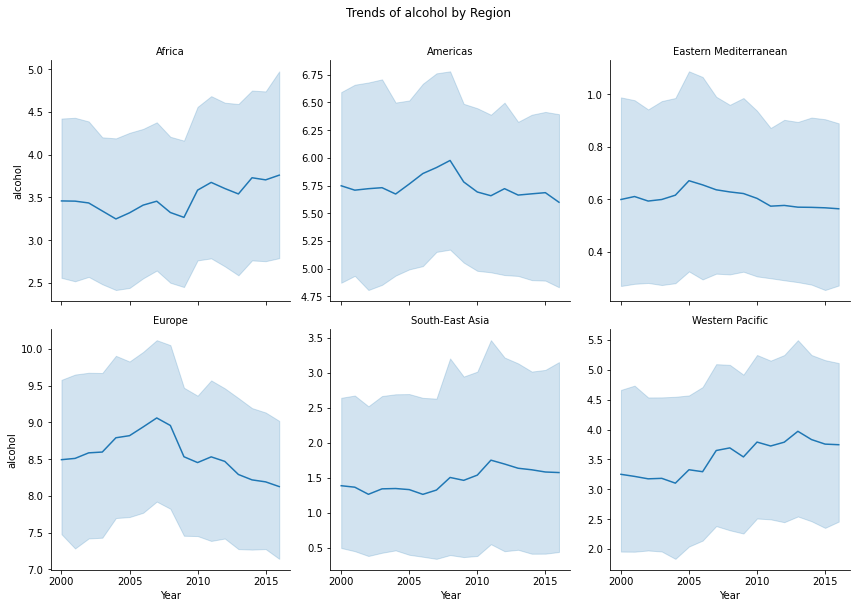

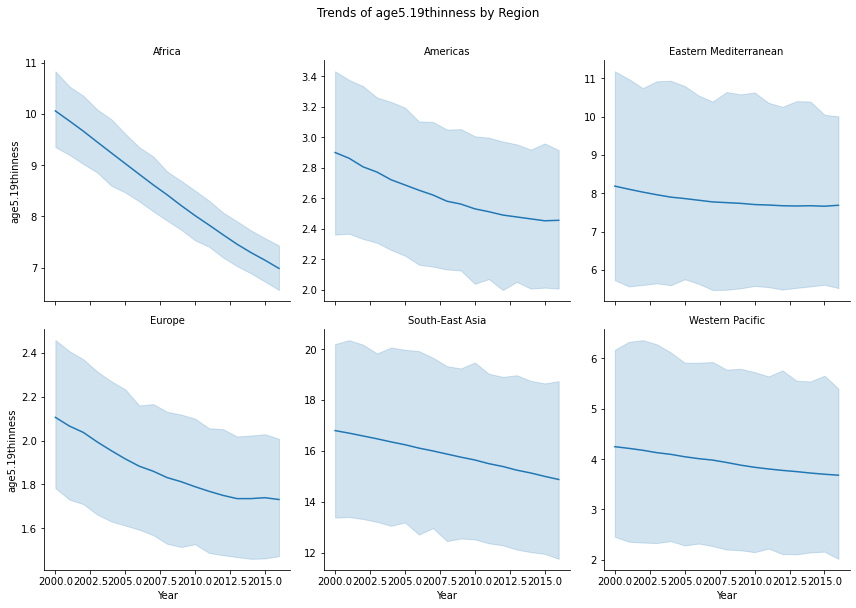

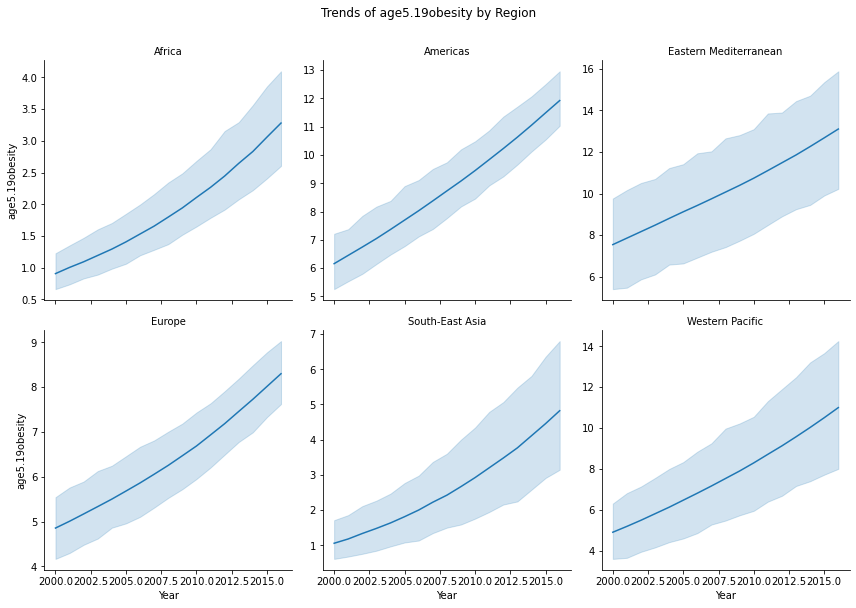

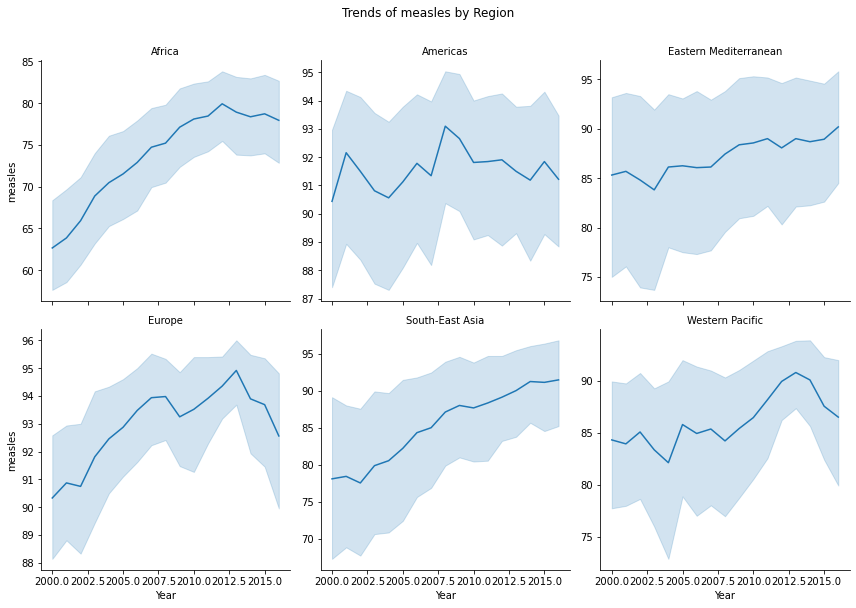

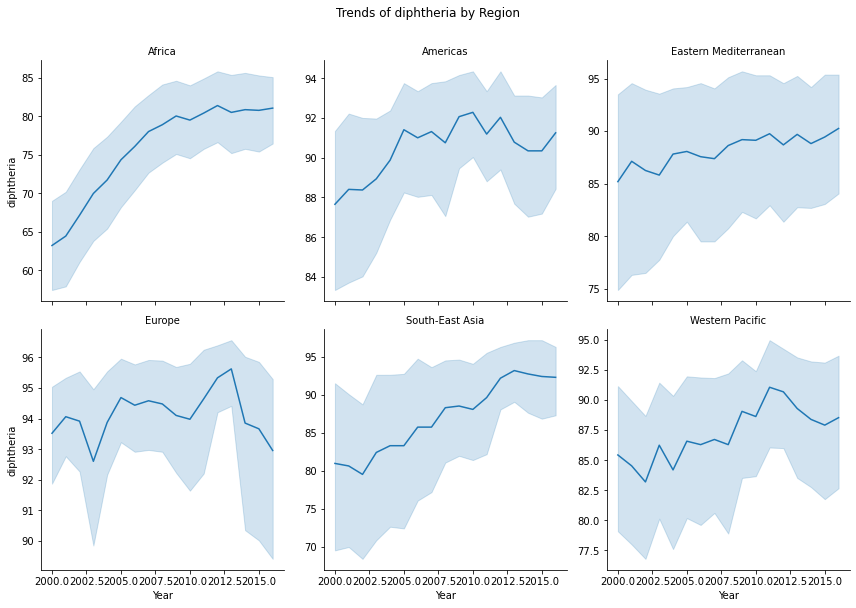

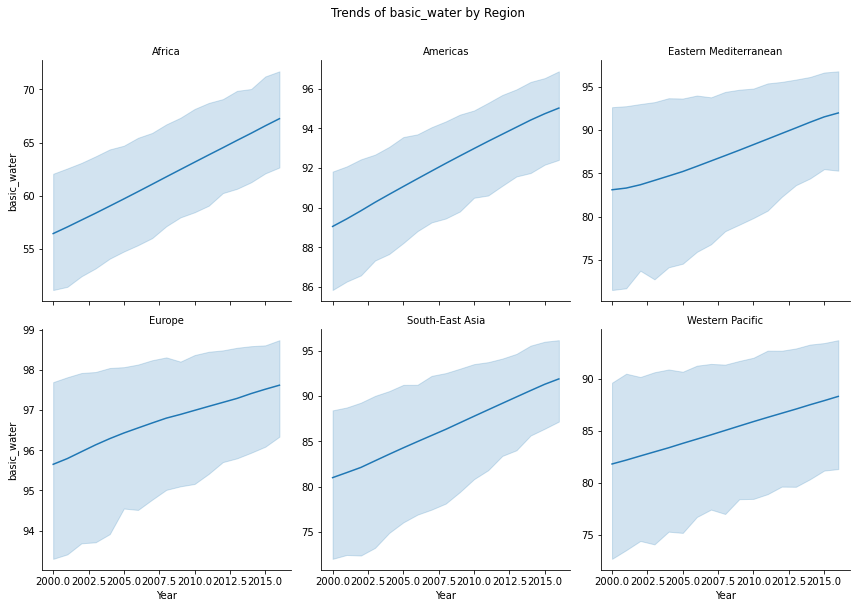

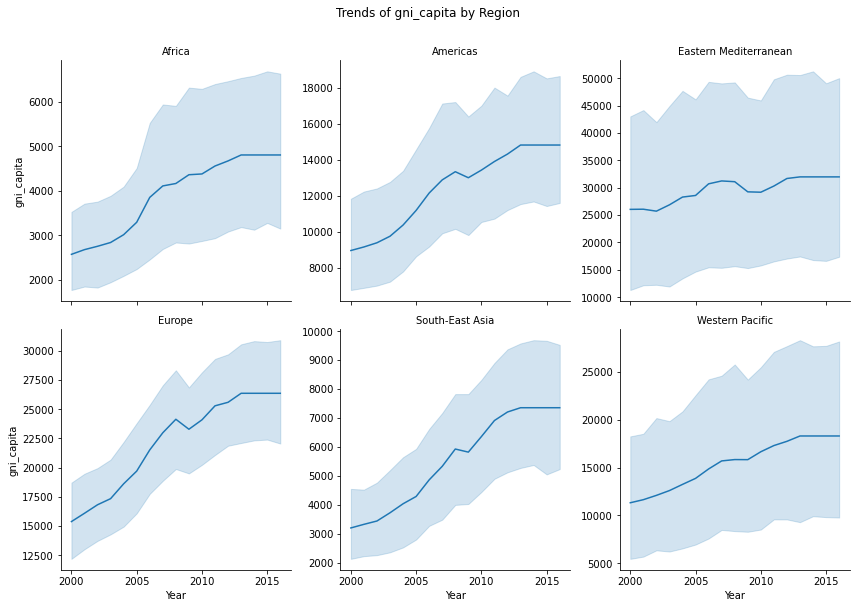

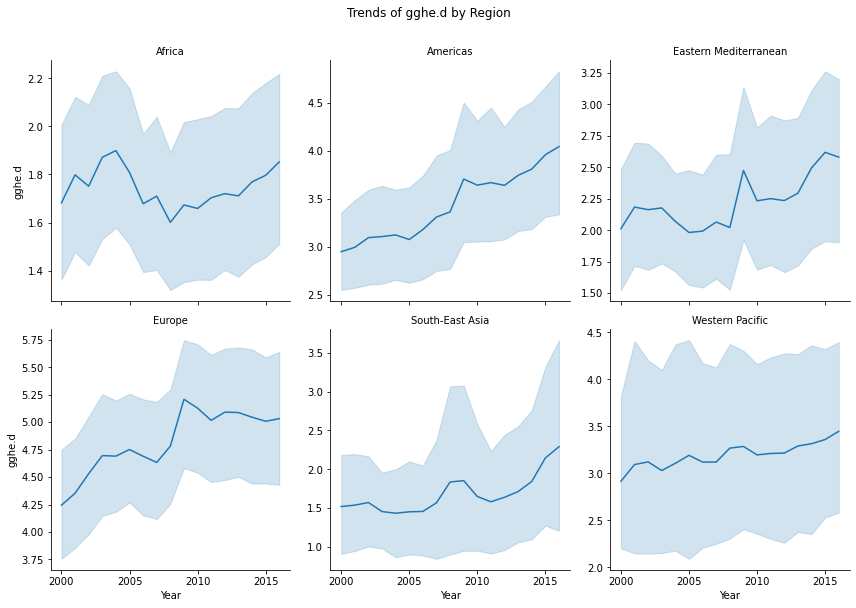

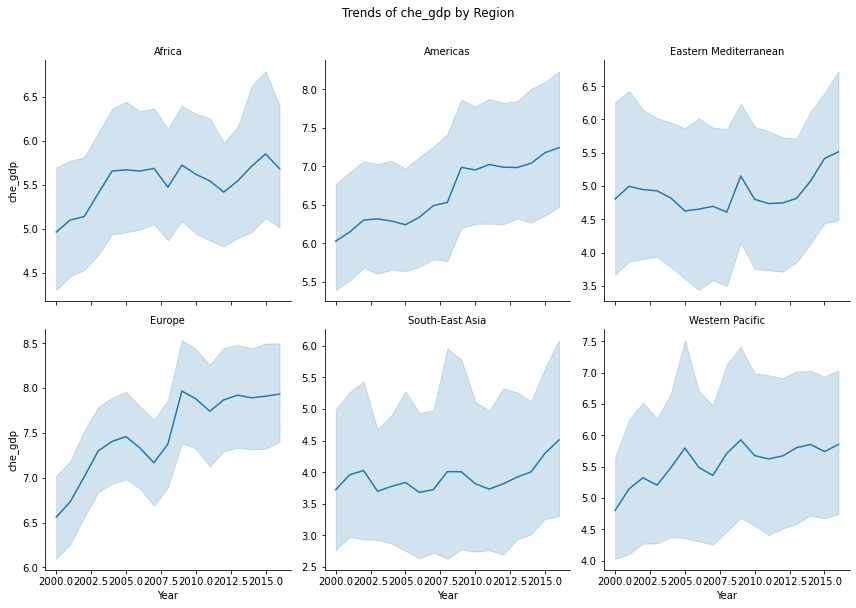

In [73]:
#create trend lines for each of the regions and each of the important variables, over the years
for variable in variables_to_compare:
    g = sns.FacetGrid(who_cleaned, col='region', col_wrap=3, height=4, sharey=False)
    g.map(sns.lineplot, 'year', variable)
    g.fig.suptitle(f'Trends of {variable} by Region', y=1.05)
    g.set_titles('{col_name}')
    g.set_axis_labels('Year', variable)
    plt.show()
